In [1]:
import numpy as np
from glob import glob
from os.path import join, basename, exists
import matplotlib.pyplot as plt
from nilearn import input_data
from sklearn.preprocessing import normalize
from nilearn import plotting
from nilearn.image import concat_imgs

/Users/Katie/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
subjects = ['HIP001', 'HIP002', 'HIP003', 'HIP004', 'HIP005',
            'HIP006', 'HIP007', 'HIP008', 'HIP009', 'HIP016',
            'HIP011', 'HIP013', 'HIP014', 'HIP015',
            'HIP018', 'HIP021', 'HIP022', 'HIP027',
            'HIP023', 'HIP024', 'HIP025', 'HIP026',
            'HIP030', 'HIP031', 'HIP033', 'HIP034']

for s in subjects[:]:
    print s
    parent_dir = '/Volumes/INGEN/data/derivatives/'
    fmri_file = join(parent_dir, s, 'func', '{0}_denoised.nii.gz'.format(s))
    confound = join(parent_dir, s, 'func', 'rest_mcf.par')
    hypothal_roi = join(parent_dir, s, 'roi', '{0}_hypothal_func_ero_noCSF_bin.nii.gz'.format(s))
    habenula_roi = join(parent_dir, s, 'roi', '{0}_hb_dil_func.nii.gz'.format(s))
    print "fmri_file exists: %s" % exists(fmri_file)
    print "confound exists: %s" % exists(confound)
    print "hypothal_roi exists: %s" % exists(hypothal_roi)
    print "habenula_roi exists: %s" % exists(habenula_roi)

HIP001
fmri_file exists: True
confound exists: True
hypothal_roi exists: True
habenula_roi exists: True
HIP002
fmri_file exists: True
confound exists: True
hypothal_roi exists: True
habenula_roi exists: True
HIP003
fmri_file exists: True
confound exists: True
hypothal_roi exists: True
habenula_roi exists: True
HIP004
fmri_file exists: True
confound exists: True
hypothal_roi exists: True
habenula_roi exists: True
HIP005
fmri_file exists: True
confound exists: True
hypothal_roi exists: True
habenula_roi exists: True
HIP006
fmri_file exists: True
confound exists: True
hypothal_roi exists: True
habenula_roi exists: True
HIP007
fmri_file exists: True
confound exists: True
hypothal_roi exists: True
habenula_roi exists: True
HIP008
fmri_file exists: True
confound exists: True
hypothal_roi exists: True
habenula_roi exists: True
HIP009
fmri_file exists: True
confound exists: True
hypothal_roi exists: True
habenula_roi exists: True
HIP016
fmri_file exists: True
confound exists: True
hypothal_roi

In [4]:
parent_dir = '/Volumes/INGEN/data/derivatives/'
#parent_dir = '/Users/Katie/Dropbox/Data/habenula/derivatives/hb_test/'
subjects = ['HIP001', 'HIP002', 'HIP003', 'HIP004', 'HIP005',
            'HIP006', 'HIP007', 'HIP008', 'HIP009', 'HIP016',
            'HIP011', 'HIP013', 'HIP014', 'HIP015',
            'HIP018', 'HIP021', 'HIP022', 'HIP027',
            'HIP023', 'HIP024', 'HIP025', 'HIP026',
            'HIP030', 'HIP031', 'HIP033', 'HIP034']

#subjects = ['HIP001']

for s in subjects[:]:
    print s
    fmri_file = join(parent_dir, s, 'func', '{0}_denoised.nii.gz'.format(s))
    #fmri_files.append(fmri_file)
    confound = join(parent_dir, s, 'func', 'rest_mcf.par')
    hypothal_roi = join(parent_dir, s, 'roi', '{0}_hypothal_func_ero_noCSF_bin.nii.gz'.format(s))
    habenula_roi = join(parent_dir, s, 'roi', '{0}_hb_dil_func.nii.gz'.format(s))
    masks_roi = concat_imgs([hypothal_roi, habenula_roi])
    bg = join(parent_dir, s, 'func', '{0}_example_func_brain.nii.gz'.format(s))
    #confounds.append(confound)
    
    hy_masker = input_data.NiftiMapsMasker(masks_roi,
                                       detrend=True, standardize=True, high_pass=0.01, t_r=3.,
                                       memory='nilearn_cache', memory_level=1, verbose=0)
    hy_timeseries = hy_masker.fit_transform(fmri_file, confounds=confound)
     
    brain_masker = input_data.NiftiMasker(
        detrend=True, standardize=True, high_pass=0.01, t_r=3., smoothing_fwhm=3.,
        memory='nilearn_cache', memory_level=1, verbose=0)
    brain_timeseries = brain_masker.fit_transform(fmri_file,
                                               confounds=confound)
    
    hy = hy_timeseries[:,0]
    hb = hb_timeseries[:,1]
    
    sbc_hy = np.dot(brain_timeseries.T, hy) / hy.shape[0]
    sbc_hy_z = np.arctanh(sbc_hy)
    sbc_hy_img = brain_masker.inverse_transform(sbc_hy.T)
    
    output_pdf = join(parent_dir, s, 'func', '{0}_sbc_hy_.pdf'.format(s))
    output_nii = join(parent_dir, s, 'func', '{0}_sbc_hy.nii.gz'.format(s))
    sbc_hy_img.to_filename(output_nii)
    display = plotting.plot_stat_map(sbc_hy_img, threshold=0.3, bg_img=bg)
    display.savefig(output_pdf)
    
    sbc_hb = np.dot(brain_timeseries.T, hb) / hb.shape[0]
    sbc_hb_z = np.arctanh(sbc_hb)
    sbc_hb_img = brain_masker.inverse_transform(sbc_hb.T)
    
    output_pdf = join(parent_dir, s, 'func', '{0}_sbc_hb.pdf'.format(s))
    output_nii = join(parent_dir, s, 'func', '{0}_sbc_hb.nii.gz'.format(s))
    sbc_hb_img.to_filename(output_nii)
    display = plotting.plot_stat_map(sbc_hb_img, threshold=0.3, bg_img=bg)
    display.savefig(output_pdf)

HIP001
HIP002
HIP003
HIP004
HIP005
HIP006
HIP007
HIP008
HIP009
HIP016
HIP011
HIP013
HIP014
HIP015
HIP018
HIP021
HIP022
HIP027
HIP023
HIP024
HIP025


/Users/Katie/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


HIP026
HIP030
HIP031
HIP033
HIP034


In [ ]:
print hy_timeseries.shape
#print brain_timeseries.shape

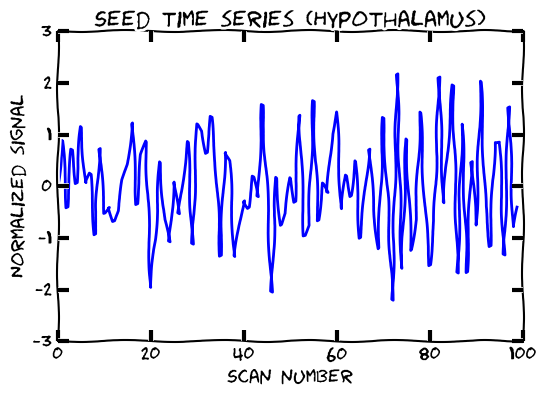

In [6]:
import matplotlib.pyplot as plt

plt.xkcd()
plt.plot(hy)
plt.title('Seed time series (Hypothalamus)')
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.show()

In [ ]:
hy = hy_timeseries[:,0]
hb = hy_timeseries[:,1]
print hy

In [ ]:
sbc_hy = np.dot(brain_timeseries.T, hy) / hy.shape[0]
sbc_hb = np.dot(brain_timeseries.T, hb) / hb.shape[0]

In [ ]:
print seed_based_correlations.shape
print (seed_based_correlations.min(), seed_based_correlations.max())

In [ ]:
sbc_hy_z = np.arctanh(sbc_hy)
sbc_hb_z = np.arctanh(sbc_hb)
print "Hypothalamus seed-based correlation Fisher-z transformed: min = %.3f; max = %.3f" % (
    sbc_hy_z.min(),
    sbc_hy_z.max())
print "Habenula seed-based correlation Fisher-z transformed: min = %.3f; max = %.3f" % (
    sbc_hb_z.min(),
    sbc_hb_z.max())

sbc_hy_img = brain_masker.inverse_transform(sbc_hy.T)
sbc_hb_img = brain_masker.inverse_transform(sbc_hb.T)
sbc_hy_img.to_filename('sbc_hy_z.nii.gz')
sbc_hb_img.to_filename('sbc_hb_z.nii.gz')

In [ ]:
print seed_based_correlation_img.shape

In [ ]:
from nilearn import plotting
bg = join(parent_dir, 'HIP001', 'func', 'HIP001_example_func_brain.nii.gz')
display = plotting.plot_stat_map(sbc_hb_img, threshold=0.3, bg_img=bg)
#display.add_markers(marker_coords=, marker_color='g',
                    #marker_size=300)
# At last, we save the plot as pdf.
display.savefig('sbc_hb_z.pdf')